## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
import tensorflow as tf
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.8)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.9129 - accuracy: 0.3148 - val_loss: 1.7836 - val_accuracy: 0.3644
Epoch 2/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.7123 - accuracy: 0.3930 - val_loss: 1.6551 - val_accuracy: 0.4135
Epoch 3/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.6235 - accuracy: 0.4250 - val_loss: 1.6981 - val_accuracy: 0.3907
Epoch 4/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.5739 - accuracy: 0.4410 - val_loss: 1.6011 - val_accuracy: 0.4324
Epoch 5/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.5270 - accuracy: 0.4594 - val_loss: 1.5941 - val_accuracy: 0.4273
Epoch 6/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.4831 - accuracy: 0.4752 - val_loss: 1.5650 - val_accuracy: 0.4459
Epoch 7/500
50000/50000 [==============================] - 3s 

Epoch 56/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.6076 - accuracy: 0.7871 - val_loss: 1.5482 - val_accuracy: 0.5335
Epoch 57/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.6061 - accuracy: 0.7882 - val_loss: 1.6466 - val_accuracy: 0.5207
Epoch 58/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.5888 - accuracy: 0.7920 - val_loss: 1.5616 - val_accuracy: 0.5372
Epoch 59/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.5788 - accuracy: 0.7988 - val_loss: 1.7726 - val_accuracy: 0.5007
Epoch 60/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.5621 - accuracy: 0.8039 - val_loss: 1.7024 - val_accuracy: 0.5292
Epoch 61/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.5580 - accuracy: 0.8058 - val_loss: 1.6000 - val_accuracy: 0.5463
Epoch 62/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.5344 - accuracy: 0.8119

Epoch 111/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.1281 - accuracy: 0.9576 - val_loss: 2.7326 - val_accuracy: 0.5350
Epoch 112/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0989 - accuracy: 0.9704 - val_loss: 2.8782 - val_accuracy: 0.5302
Epoch 113/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1775 - accuracy: 0.9378 - val_loss: 2.7983 - val_accuracy: 0.5387
Epoch 114/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1150 - accuracy: 0.9633 - val_loss: 2.8115 - val_accuracy: 0.5319
Epoch 115/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1023 - accuracy: 0.9672 - val_loss: 2.9283 - val_accuracy: 0.5356
Epoch 116/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.1020 - accuracy: 0.9677 - val_loss: 2.8428 - val_accuracy: 0.5347
Epoch 117/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0929 - accuracy:

50000/50000 [==============================] - 3s 54us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.7393 - val_accuracy: 0.5526
Epoch 166/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 3.7353 - val_accuracy: 0.5516
Epoch 167/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 3.7571 - val_accuracy: 0.5517
Epoch 168/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.7565 - val_accuracy: 0.5537
Epoch 169/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 3.7704 - val_accuracy: 0.5514
Epoch 170/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.7855 - val_accuracy: 0.5519
Epoch 171/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0022 - accuracy: 1.0000 - val_

Epoch 220/500
50000/50000 [==============================] - 3s 61us/step - loss: 9.9195e-04 - accuracy: 1.0000 - val_loss: 4.0501 - val_accuracy: 0.5526
Epoch 221/500
50000/50000 [==============================] - 3s 69us/step - loss: 9.8681e-04 - accuracy: 1.0000 - val_loss: 4.0581 - val_accuracy: 0.5528
Epoch 222/500
50000/50000 [==============================] - 3s 55us/step - loss: 9.7439e-04 - accuracy: 1.0000 - val_loss: 4.0625 - val_accuracy: 0.5511
Epoch 223/500
50000/50000 [==============================] - 4s 70us/step - loss: 9.6820e-04 - accuracy: 1.0000 - val_loss: 4.0606 - val_accuracy: 0.5539
Epoch 224/500
50000/50000 [==============================] - 3s 64us/step - loss: 9.5882e-04 - accuracy: 1.0000 - val_loss: 4.0719 - val_accuracy: 0.5518
Epoch 225/500
50000/50000 [==============================] - 4s 73us/step - loss: 9.4840e-04 - accuracy: 1.0000 - val_loss: 4.0774 - val_accuracy: 0.5526
Epoch 226/500
50000/50000 [==============================] - 5s 96us/step - 

50000/50000 [==============================] - 3s 56us/step - loss: 6.4069e-04 - accuracy: 1.0000 - val_loss: 4.2279 - val_accuracy: 0.5521
Epoch 274/500
50000/50000 [==============================] - 3s 56us/step - loss: 6.3447e-04 - accuracy: 1.0000 - val_loss: 4.2334 - val_accuracy: 0.5522
Epoch 275/500
50000/50000 [==============================] - 3s 57us/step - loss: 6.3063e-04 - accuracy: 1.0000 - val_loss: 4.2309 - val_accuracy: 0.5517
Epoch 276/500
50000/50000 [==============================] - 3s 56us/step - loss: 6.2647e-04 - accuracy: 1.0000 - val_loss: 4.2404 - val_accuracy: 0.5519
Epoch 277/500
50000/50000 [==============================] - 3s 57us/step - loss: 6.2006e-04 - accuracy: 1.0000 - val_loss: 4.2408 - val_accuracy: 0.5517
Epoch 278/500
50000/50000 [==============================] - 3s 56us/step - loss: 6.1989e-04 - accuracy: 1.0000 - val_loss: 4.2435 - val_accuracy: 0.5534
Epoch 279/500
50000/50000 [==============================] - 3s 56us/step - loss: 6.1465e-

50000/50000 [==============================] - 3s 55us/step - loss: 4.6739e-04 - accuracy: 1.0000 - val_loss: 4.3613 - val_accuracy: 0.5521
Epoch 327/500
50000/50000 [==============================] - 3s 63us/step - loss: 4.6567e-04 - accuracy: 1.0000 - val_loss: 4.3642 - val_accuracy: 0.5514
Epoch 328/500
50000/50000 [==============================] - 3s 59us/step - loss: 4.6166e-04 - accuracy: 1.0000 - val_loss: 4.3666 - val_accuracy: 0.5522
Epoch 329/500
50000/50000 [==============================] - 3s 59us/step - loss: 4.5874e-04 - accuracy: 1.0000 - val_loss: 4.3700 - val_accuracy: 0.5519
Epoch 330/500
50000/50000 [==============================] - 3s 54us/step - loss: 4.5796e-04 - accuracy: 1.0000 - val_loss: 4.3687 - val_accuracy: 0.5529
Epoch 331/500
50000/50000 [==============================] - 3s 54us/step - loss: 4.5596e-04 - accuracy: 1.0000 - val_loss: 4.3751 - val_accuracy: 0.5515
Epoch 332/500
50000/50000 [==============================] - 3s 54us/step - loss: 4.5204e-

50000/50000 [==============================] - 3s 55us/step - loss: 3.6667e-04 - accuracy: 1.0000 - val_loss: 4.4686 - val_accuracy: 0.5528
Epoch 380/500
50000/50000 [==============================] - 3s 55us/step - loss: 3.6550e-04 - accuracy: 1.0000 - val_loss: 4.4737 - val_accuracy: 0.5521
Epoch 381/500
50000/50000 [==============================] - 3s 60us/step - loss: 3.6222e-04 - accuracy: 1.0000 - val_loss: 4.4720 - val_accuracy: 0.5525
Epoch 382/500
50000/50000 [==============================] - 3s 61us/step - loss: 3.6181e-04 - accuracy: 1.0000 - val_loss: 4.4732 - val_accuracy: 0.5524
Epoch 383/500
50000/50000 [==============================] - 3s 56us/step - loss: 3.5980e-04 - accuracy: 1.0000 - val_loss: 4.4747 - val_accuracy: 0.5519
Epoch 384/500
50000/50000 [==============================] - 3s 56us/step - loss: 3.5978e-04 - accuracy: 1.0000 - val_loss: 4.4785 - val_accuracy: 0.5518
Epoch 385/500
50000/50000 [==============================] - 3s 56us/step - loss: 3.5719e-

50000/50000 [==============================] - 3s 55us/step - loss: 3.0022e-04 - accuracy: 1.0000 - val_loss: 4.5579 - val_accuracy: 0.5516
Epoch 433/500
50000/50000 [==============================] - 3s 56us/step - loss: 2.9849e-04 - accuracy: 1.0000 - val_loss: 4.5563 - val_accuracy: 0.5516
Epoch 434/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.9823e-04 - accuracy: 1.0000 - val_loss: 4.5604 - val_accuracy: 0.5519
Epoch 435/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.9586e-04 - accuracy: 1.0000 - val_loss: 4.5608 - val_accuracy: 0.5523
Epoch 436/500
50000/50000 [==============================] - 3s 56us/step - loss: 2.9523e-04 - accuracy: 1.0000 - val_loss: 4.5637 - val_accuracy: 0.5519
Epoch 437/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.9411e-04 - accuracy: 1.0000 - val_loss: 4.5641 - val_accuracy: 0.5525
Epoch 438/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.9333e-

50000/50000 [==============================] - 3s 56us/step - loss: 2.5293e-04 - accuracy: 1.0000 - val_loss: 4.6335 - val_accuracy: 0.5518
Epoch 486/500
50000/50000 [==============================] - 3s 56us/step - loss: 2.5197e-04 - accuracy: 1.0000 - val_loss: 4.6338 - val_accuracy: 0.5516
Epoch 487/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.5075e-04 - accuracy: 1.0000 - val_loss: 4.6359 - val_accuracy: 0.5512
Epoch 488/500
50000/50000 [==============================] - 3s 56us/step - loss: 2.5041e-04 - accuracy: 1.0000 - val_loss: 4.6358 - val_accuracy: 0.5524
Epoch 489/500
50000/50000 [==============================] - 3s 56us/step - loss: 2.5008e-04 - accuracy: 1.0000 - val_loss: 4.6370 - val_accuracy: 0.5516
Epoch 490/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.4919e-04 - accuracy: 1.0000 - val_loss: 4.6400 - val_accuracy: 0.5515
Epoch 491/500
50000/50000 [==============================] - 3s 59us/step - loss: 2.4804e-

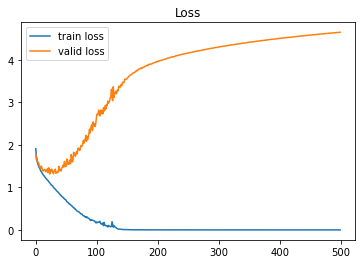

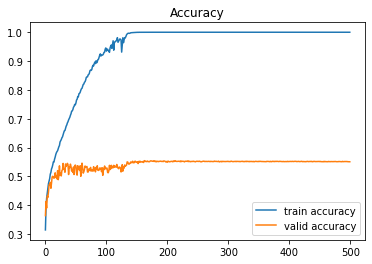

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()